# **CREDIT CARD FRAUD DETECTION**



---

> IMPORTING REQUIRED LIBRARIES

---



In [1]:
import pandas as pd
import numpy as np
import itertools
import time

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




---

> LOAD IN THE DATASET

---



In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0




---

> EXPLORATORY DATA ANALYSIS

---



In [3]:
# Find the rows and columns size
data.shape

(93181, 31)

In [4]:
# Columns present for the dataset
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# Checking the datatypes of attributes
data.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [6]:
# Summary of the attributes
data.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,93181.000000,93181.000000,93181.000000,93181.000000,93181.000000,93181.000000,93181.000000,93181.000000,93181.000000,93181.000000,93181.000000,93181.000000,93181.000000,93180.000000,93180.000000,93180.000000,93180.000000,93180.000000,93180.000000,93180.000000,93180.000000,93180.000000,93180.000000,93180.000000,93180.000000,93180.000000,93180.000000,93180.000000,93180.000000,93180.000000,93180.000000
mean,40720.460405,-0.263002,-0.040780,0.676306,0.163064,-0.280078,0.093917,-0.108816,0.055540,-0.036898,-0.028962,0.259526,-0.087473,0.017106,0.069295,0.186970,-0.008020,0.063163,-0.094407,-0.023654,0.043406,-0.029999,-0.107373,-0.037835,0.009540,0.132163,0.026936,0.001515,0.002321,99.030945,0.002286
std,16392.444505,1.869011,1.664308,1.341575,1.355105,1.368687,1.303615,1.225238,1.209672,1.123318,1.061228,1.070547,1.134191,1.045430,0.975574,0.930851,0.904213,0.957231,0.850367,0.818650,0.766201,0.723135,0.634840,0.640783,0.594557,0.442183,0.495719,0.389447,0.324150,268.350415,0.047757
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,-18.271168,-4.049895,-17.769143,-5.791881,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-7.213527,-21.024817,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,32678.000000,-1.028016,-0.605706,0.179018,-0.716783,-0.898708,-0.647692,-0.600859,-0.139122,-0.695859,-0.499901,-0.516607,-0.510131,-0.672454,-0.330117,-0.366028,-0.483283,-0.397673,-0.566361,-0.518500,-0.169329,-0.224205,-0.528068,-0.177280,-0.322364,-0.132298,-0.325627,-0.062925,-0.005614,7.600000,0.000000
50%,42848.000000,-0.258489,0.072818,0.756532,0.189117,-0.314928,-0.156536,-0.069893,0.072409,-0.109294,-0.095218,0.191960,0.100958,-0.000652,0.083341,0.291392,0.065516,0.004842,-0.087449,-0.027331,-0.024857,-0.057606,-0.082454,-0.049500,0.064890,0.170764,-0.070610,0.009579,0.023267,26.945000,0.000000
75%,53622.000000,1.153021,0.728656,1.381324,1.034477,0.250915,0.487658,0.415870,0.357253,0.576494,0.439437,1.072675,0.617324,0.696919,0.500671,0.859559,0.539365,0.464414,0.388992,0.480079,0.171162,0.119664,0.309217,0.081457,0.406029,0.420096,0.304235,0.082701,0.076475,89.990000,0.000000
max,64283.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,13.198226,12.018913,7.848392,4.465413,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,22.614889,10.503090,18.946734,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [7]:
# Checking for null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [0]:
# Null values are present
# Replacing null values with mean
data.fillna(data.mean(), inplace=True)

In [9]:
# No null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0, 0.5, 'Frequency')

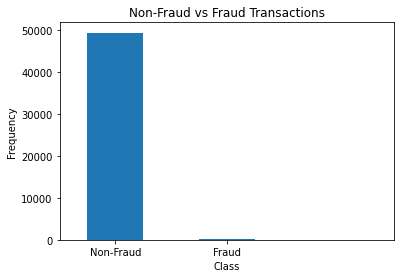

In [0]:
# 'Class' is the target variable
# It has two values counts - Fraud and Non-fraud
# Plot showing the counts of both counts
# Most of them are Non-fraud
# This is an unbalanced dataset

count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title('Non-Fraud vs Fraud Transactions')
plt.xticks(range(2), ['Non-Fraud', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Frequency')

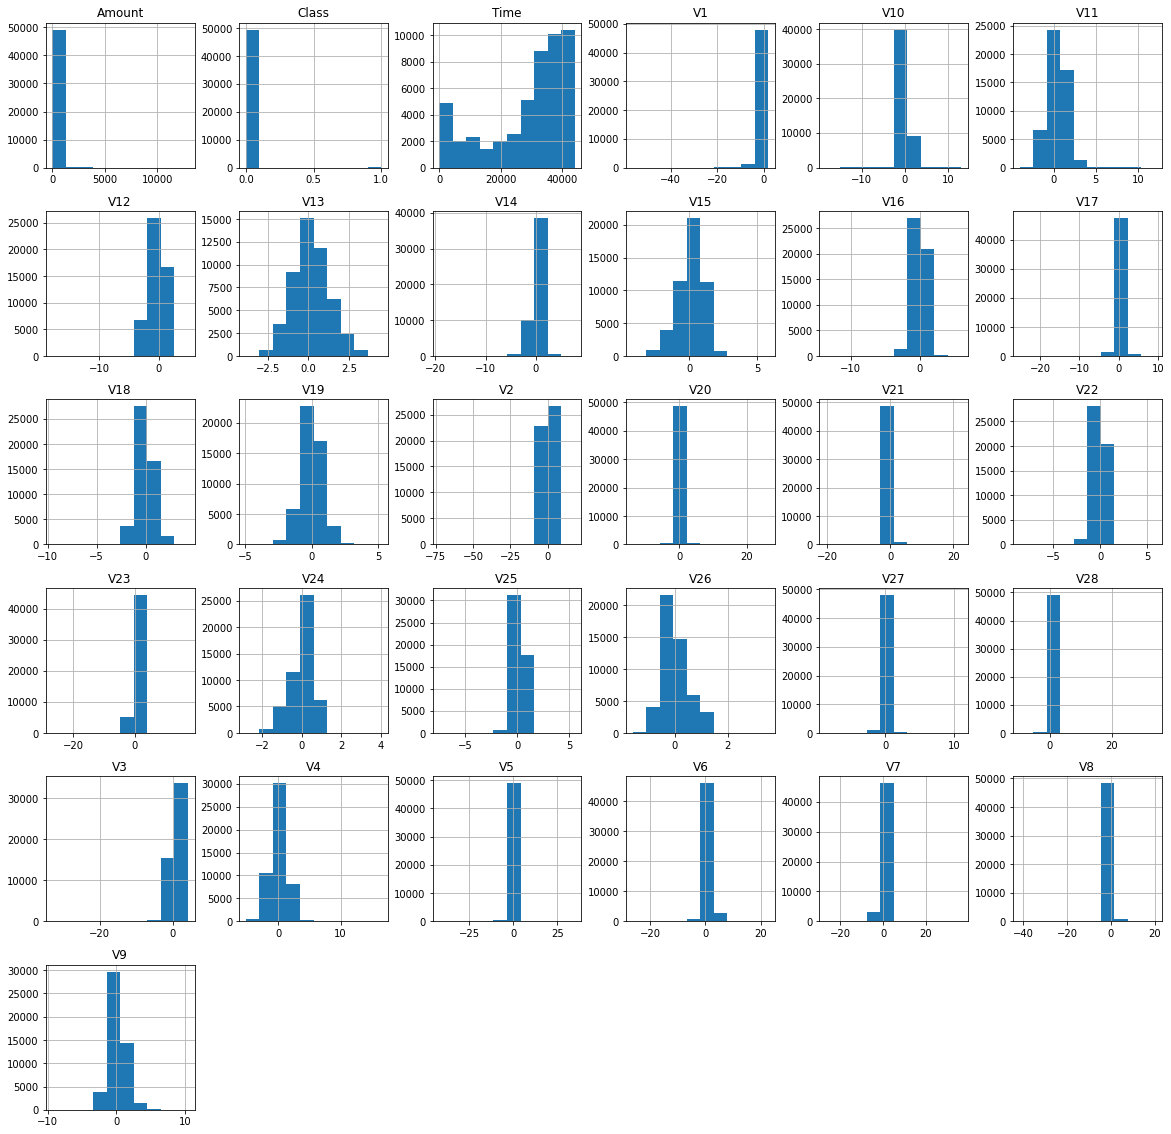

In [0]:
# Plotting a histogram for each attribute
data.hist(figsize=(20,20));

In [0]:
# Finding exact number of Fraud and Non-fraud values
# Fraud percentage is less than 1% of total transactions

fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

print('Fraud shape: {}'.format(fraud.shape))
print('Non-Fraud shape: {}'.format(normal.shape))
print('Percentage of fraud transcation: {:.4f}%'.format(len(fraud)/len(normal) * 100))

Fraud shape: (148, 31)
Non-Fraud shape: (49461, 31)
Percentage of fraud transcation: 0.2992%


In [0]:
# Summary of Fraud transactions
fraud.Amount.describe()

count     148.000000
mean      100.170676
std       233.347471
min         0.000000
25%         1.000000
50%         9.560000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [0]:
# Summary of Normal transactions
normal.Amount.describe()

count    49461.000000
mean        93.099593
std        253.325102
min          0.000000
25%          7.680000
50%         25.000000
75%         85.000000
max      12910.930000
Name: Amount, dtype: float64

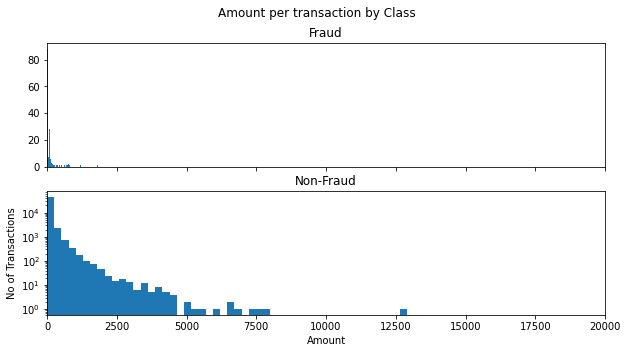

In [0]:
# Plot for showing the amount for both classes
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,5))
fig.suptitle('Amount per transaction by Class')
ax1.hist(fraud.Amount, bins=50)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins=50)
ax2.set_title('Non-Fraud')
plt.xlabel('Amount')
plt.ylabel('No of Transactions')
plt.xlim(0, 20000)
plt.yscale('log')

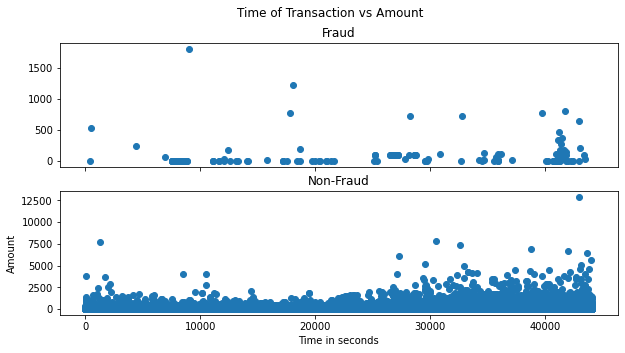

In [0]:
# Plot for Fraud and Normal transcations over time intervals
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,5))
fig.suptitle('Time of Transaction vs Amount')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Non-Fraud')
plt.xlabel('Time in seconds')
plt.ylabel('Amount')
plt.show()

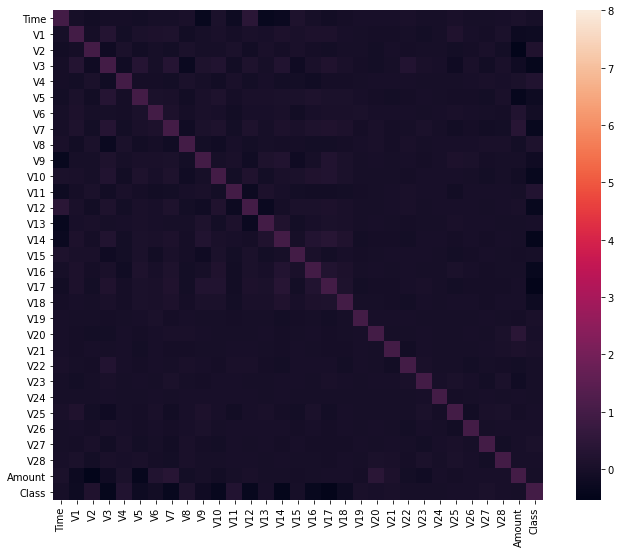

In [0]:
# Heatmap to find any correlation between attributes
corr_matrix = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=8, square=True)



---

> APPLYING TRANSFORMATION ON DATA

---



In [0]:
# The columns from 'V1' to 'V28' are alread normalized
# Applying scaling on the 'Time' and 'Amount' attributes
# Using RobustScaler as its less prone to outliers
# and we need to detect outliers

rob_scaler = RobustScaler()

data['Scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1, 1))
data['Scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

data.drop(['Time', 'Amount'], axis=1, inplace=True)

In [13]:
# Adding and removing columns

scaled_amount = data['Scaled_amount']
scaled_time = data['Scaled_time']

data.drop(['Scaled_amount', 'Scaled_time'], axis=1, inplace=True)
data.insert(0, 'Scaled_amount', scaled_amount)
data.insert(1, 'Scaled_time', scaled_time)

# Amount and Time are Scaled!
data.head()

,Scaled_amount,Scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.488894,-2.045837,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.294453,-2.045837,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,4.268843,-2.045789,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,1.171866,-2.045789,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,0.522393,-2.045741,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [0]:
# Splitting of data for model
# X - Predictor variable
# y - Target variable

X = data.iloc[:,:-1]
y = data[['Class']]

In [66]:
# Splitting into train and test values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (74544, 30)
X_test shape: (18637, 30)




---

> TRAINING THE MODELS

---



In [0]:
# This is a classification task
# We will use the following models

classifiers = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(),
    'MLPClassifier': MLPClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier()
}

In [0]:
# Function to train model and do predictions
# We want a model with high recall as to detect outliers - Fraud transcations

precision = []
recall = []

for name, clf in classifiers.items():
    start = time.time()
    name = clf.fit(X_train, y_train)
    end = time.time()
    y_pred = name.predict(X_test)
    
    print('****************************************************************************************')
    print('\nModel: {}'.format(name))
    print('\nTime taken: {:.2f}min'.format((end-start)/60))
    print('\nTrainig Accuracy: {:.2f}%'.format(name.score(X_train, y_train)*100))
    print('\nTest Accuracy: {:.2f}%'.format(name.score(X_test, y_test)*100))
    #print('\nConfusion Matrix: \n')
    #print(confusion_matrix(y_test, y_pred))
    print('\nPrecision Score: {:.3f}'.format(precision_score(y_test, y_pred)))
    print('\nRecall Score: {:.3f}'.format(recall_score(y_test, y_pred)))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    print('\n')
    print('*****************************************************************************************')
    
# i = recall.index(max(recall))
# print('\nModel with best recall: {}'.format(classifiers[i]))
# print('\nRecall: {}, Precision: {}'.format(recall[i], precision[i]))

****************************************************************************************

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Time taken: 0.01min

Trainig Accuracy: 99.87%

Test Accuracy: 99.82%

Precision Score: 0.692

Recall Score: 0.692


*****************************************************************************************
****************************************************************************************

Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impuri

In [0]:
# Wow our scores are getting even high scores even when applying cross validation.

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(classifier.__class__.__name__, ": ", round(training_score.mean(), 2) * 100, "% accuracy score")

LogisticRegression :  100.0 % accuracy score
RandomForestClassifier :  100.0 % accuracy score
AdaBoostClassifier :  100.0 % accuracy score
DecisionTreeClassifier :  100.0 % accuracy score
SVC :  100.0 % accuracy score
MLPClassifier :  100.0 % accuracy score
KNeighborsClassifier :  100.0 % accuracy score
XGBClassifier :  100.0 % accuracy score


In [0]:
# Use GridSearchCV to find the best parameters.


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_


# K-Nears
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_


# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
# SVC best estimator
svc = grid_svc.best_estimator_


# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
# tree best estimator
tree_clf = grid_tree.best_estimator_

# Random
random_params =  { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}
grid_random = GridSearchCV(RandomForestClassifier(), random_params)
grid_random.fit(X_train, y_train)
# random best estimator
random_clf = grid_random.best_estimator_

# MLP
mlp_params = {'solver': ['lbfgs'], 
              'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000], 
              'alpha': 10.0 ** -np.arange(1, 10), 
              'hidden_layer_sizes':np.arange(10, 15)}
grid_mlp = GridSearchCV(MLPClassifier(), mlp_params)
grid_mlp.fit(X_train, y_train)
# random best estimator
mlp_clf = grid_mlp.best_estimator_  

# Ada
ada_params = {'base_estimator__max_depth':[1,50],
          'base_estimator':[DecisionTreeClassifier(max_features=2), DecisionTreeClassifier(max_features=10)]}
grid_ada = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), ada_params)
grid_ada.fit(X_train, y_train)
# best
ada_clf = grid_ada.best_estimator_

In [0]:
# Now we will train models again with the parameters obtained from
# GridSearchCV
# Lets see if we can get higher recall values

estimators = [log_reg, random_clf, ada_clf ,tree_clf, svc, mlp_clf, knears_neighbors]

names = ["Logistic Regression", "Nearest Neighbors",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    MLPClassifier(),
    KNeighborsClassifier()]

In [0]:
# Function to train model and do predictions, with best parameters
precision = []
recall = []

for name, clf, est in zip(names, classifiers, estimators):
    start = time.time()
    name = est.fit(X_train, y_train)
    end = time.time()
    y_pred = name.predict(X_test)
    
    print('****************************************************************************************')
    print('\nModel: {}'.format(name))
    print('\nTime taken: {:.2f}min'.format((end-start)/60))
    print('\nTrainig Accuracy: {:.2f}%'.format(name.score(X_train, y_train)*100))
    print('\nTest Accuracy: {:.2f}%'.format(name.score(X_test, y_test)*100))
    #print('\nConfusion Matrix: \n')
    #print(confusion_matrix(y_test, y_pred))
    print('\nPrecision Score: {:.3f}'.format(precision_score(y_test, y_pred)))
    print('\nRecall Score: {:.3f}'.format(recall_score(y_test, y_pred)))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    print('\n')
    print('*****************************************************************************************')
    
i = recall.index(max(recall))
print('\nModel with best recall: {}'.format(names[i]))
print('\nRecall: {}, Precision: {}'.format(recall[i], precision[i]))

****************************************************************************************

Model: LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Time taken: 0.01min

Trainig Accuracy: 99.89%

Test Accuracy: 99.84%

Precision Score: 0.750

Recall Score: 0.692


*****************************************************************************************
****************************************************************************************

Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurit

In [72]:
# As Neural net and KNN has same score we will test using both
# The better one will be chosen

mlp = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print('Confusion Matrix:\n',confusion_matrix(y_test.round(), y_pred_mlp.round()))
print('Recall score: ',recall_score(y_test.round(),y_pred_mlp.round()))
print('Precision score:',precision_score(y_test.round(),y_pred_mlp.round()))

Confusion Matrix:
 [[18586     8]
 [   12    31]]
Recall score:  0.7209302325581395
Precision score: 0.7948717948717948


In [73]:
# KNN has lower recall than MLP on test set

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print('Confusion Matrix: \n',confusion_matrix(y_test.round(), y_pred_knn.round()))
print('Recall score: ',recall_score(y_test.round(),y_pred_knn.round()))
print('Precision score: ',precision_score(y_test.round(),y_pred_knn.round()))

Confusion Matrix: 
 [[18592     2]
 [   13    30]]
Recall score:  0.6976744186046512
Precision score:  0.9375


In [0]:
# As Neural net has higher recall we will use that and
# Prepare submission file

output = pd.DataFrame({'Time': X_test.Scaled_time, 'Amount': X_test.Scaled_amount, 'Prediction': y_pred_mlp})
output.to_csv('submission.csv', index=False)